In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import acquire
import prepare
import numpy as np
import nltk
import unicodedata
import re
import nltk.sentiment
import nltk.sentiment

from wordcloud import WordCloud
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [14]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [15]:
# acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# combine all messages in single string by label
ham_words = clean(' '.join(df[df.label== 'ham'].text))
spam_words = clean(' '.join(df[df.label== 'spam'].text))
all_words = clean(' '.join(df.text))

In [17]:
ham_words = ' '.join(ham_words)
spam_words = ' '.join(spam_words)
all_words = ' '.join(all_words)

# Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [18]:
ham_bigrams = pd.Series(list(nltk.bigrams(ham_words.split())))
spam_bigrams = pd.Series(list(nltk.bigrams(spam_words.split())))


In [19]:
ham_bigrams.value_counts()

(call, later)     52
(ill, call)       48
(let, know)       42
(sorry, ill)      39
(dont, know)      32
                  ..
(cant, ever)       1
(master, cant)     1
(dont, master)     1
(biro, dont)       1
(true, name)       1
Length: 30869, dtype: int64

In [20]:
spam_tuples = spam_bigrams.value_counts().head(20).index.to_list()
spam_tuples

[('please', 'call'),
 ('customer', 'service'),
 ('po', 'box'),
 ('a1000', 'cash'),
 ('guaranteed', 'call'),
 ('prize', 'guaranteed'),
 ('send', 'stop'),
 ('selected', 'receive'),
 ('await', 'collection'),
 ('every', 'week'),
 ('chance', 'win'),
 ('urgent', 'mobile'),
 ('land', 'line'),
 ('valid', '12hrs'),
 ('claim', 'call'),
 ('sae', 'tc'),
 ('account', 'statement'),
 ('call', '08000930705'),
 ('prize', 'claim'),
 ('ur', 'mob')]

In [21]:
ham_tuples = ham_bigrams.value_counts().head(20).index.to_list()
ham_tuples

[('call', 'later'),
 ('ill', 'call'),
 ('let', 'know'),
 ('sorry', 'ill'),
 ('dont', 'know'),
 ('good', 'morning'),
 ('new', 'year'),
 ('take', 'care'),
 ('im', 'going'),
 ('ok', 'lor'),
 ('pls', 'send'),
 ('im', 'gonna'),
 ('good', 'night'),
 ('happy', 'new'),
 ('wat', 'time'),
 ('last', 'night'),
 ('hi', 'hi'),
 ('great', 'day'),
 ('dont', 'want'),
 ('want', 'go')]

In [22]:
ham_sandwich = [' '.join(tuples) for tuples in ham_tuples]
spam_sandwich = [' '.join(tuples) for tuples in spam_tuples]

(-0.5, 399.5, 199.5, -0.5)

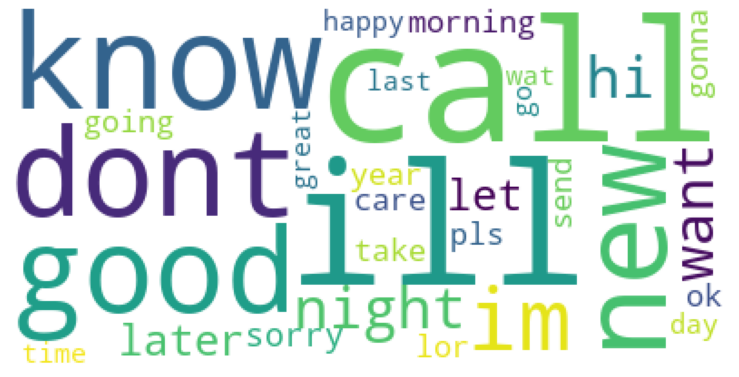

In [23]:

img = WordCloud(background_color='white').generate(' '.join(ham_sandwich))
plt.imshow(img)
plt.axis('off')

In [29]:
blogs = acquire.get_blog_articles()

In [30]:
blogs

,title,content
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio..."
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...


In [35]:
blogs['cleaned'] = blogs.content.apply(prepare.basic_clean).apply(prepare.tokenize).apply(prepare.remove_stopwords)



In [36]:
blogs

,title,content,cleaned
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo...",many people deciding coding bootcamp computer ...
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup excited launch first diversity equity i...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup named 2022 diversity inclusion award wi...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,deciding transition tech career big step signi...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",codeup strongly values diversity inclusion hon...
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...,many companies switching cloud services implem...


In [37]:
blog_words = ' '.join(blogs.cleaned)
blog_words

'many people deciding coding bootcamp computer science degree tough would like lend hand comparing programs shed light key similarities differences codeup degree key differences 1 time commitment codeups programs range 15 20 weeks fulltime courses requiring students class 9 5 pm monday friday average fulltime enrollee obtaining bachelors degree computer science expect commit four years 208 weeks 2 job placement student decides attend codeup built tuition placement assistance team dedicated placing students jobs infield upon completion codeup program unfortunately colleges universities offer placement assistance schools may facilitate job fairs share new job listings students efforts extend beyond 3 tuition refund guarantee codeup 100 tuition refund guarantee means placement team cannot place job infield within six months graduation codeup program 100 paid tuition refunded colleges universities offer tuition refunds students unsuccessful gaining employment pertaining field study key sim

<AxesSubplot:>

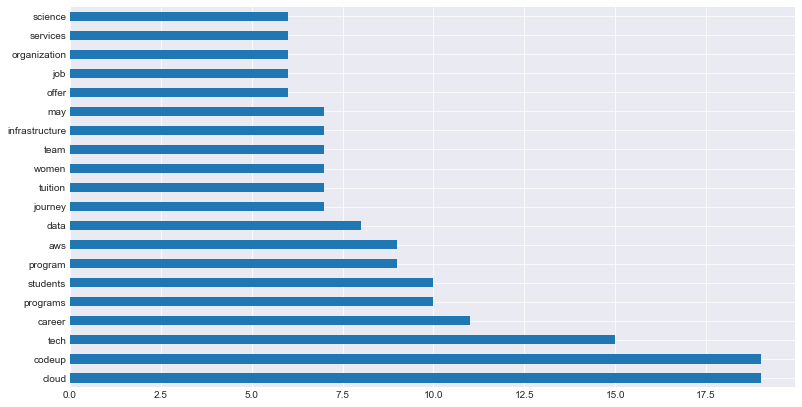

In [38]:
word_freq = pd.Series(blog_words.split()).value_counts()
word_freq.head(20).plot.barh()

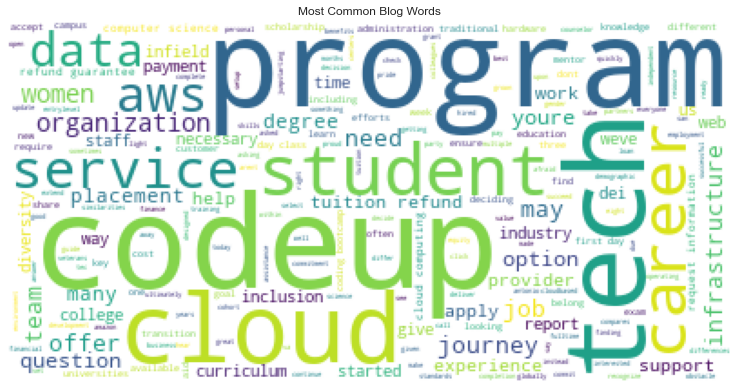

In [39]:
img = WordCloud(background_color='white'
               ).generate(blog_words)
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Blog Words')
plt.show()

In [40]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores(blog_words)

{'neg': 0.04, 'neu': 0.732, 'pos': 0.228, 'compound': 0.9997}

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.



In [2]:
news = acquire.get_news_articles()

In [3]:
news

,title,content,category
0,"British artist live-streams burning 1,000 of h...","British artist Damien Hirst burnt 1,000 painti...",technology
1,"Infosys' attrition drops to 27.1%, net employe...",Infosys on Thursday reported a 1.3% QoQ drop i...,technology
2,Musk sells $1 million worth of 'Burnt Hair' pe...,The world's richest person Elon Musk earned a ...,technology
3,Layoffs will be the absolute last thing at Zoh...,Software startup Zoho's CEO Sridhar Vembu said...,technology
4,We do not support dual employment: Infosys on ...,Infosys CEO Salil Parekh spoke on the moonligh...,technology
...,...,...,...
94,"I didn't, he blocked me: Charu on reports she ...",Actress Charu Asopa has reacted to reports tha...,entertainment
95,Filmmaker Vishal Bhardwaj buys new luxury apar...,Vishal Bhardwaj has reportedly purchased a new...,entertainment
96,Was heartbroken after being rejected for 'Baji...,"Actor Addinath Kothare, who made his Bollywood...",entertainment
97,Hindu Sena files PIL in Delhi HC against Om Ra...,A PIL has been filed in Delhi HC against Om Ra...,entertainment


In [4]:
news['cleaned'] = news.content.apply(prepare.basic_clean).apply(prepare.tokenize).apply(prepare.remove_stopwords)
news


,title,content,category,cleaned
0,"British artist live-streams burning 1,000 of h...","British artist Damien Hirst burnt 1,000 painti...",technology,british artist damien hirst burnt 1000 paintin...
1,"Infosys' attrition drops to 27.1%, net employe...",Infosys on Thursday reported a 1.3% QoQ drop i...,technology,infosys thursday reported 13 qoq drop voluntar...
2,Musk sells $1 million worth of 'Burnt Hair' pe...,The world's richest person Elon Musk earned a ...,technology,worlds richest person elon musk earned million...
3,Layoffs will be the absolute last thing at Zoh...,Software startup Zoho's CEO Sridhar Vembu said...,technology,software startup zohos ceo sridhar vembu said ...
4,We do not support dual employment: Infosys on ...,Infosys CEO Salil Parekh spoke on the moonligh...,technology,infosys ceo salil parekh spoke moonlighting de...
...,...,...,...,...
94,"I didn't, he blocked me: Charu on reports she ...",Actress Charu Asopa has reacted to reports tha...,entertainment,actress charu asopa reacted reports claimed un...
95,Filmmaker Vishal Bhardwaj buys new luxury apar...,Vishal Bhardwaj has reportedly purchased a new...,entertainment,vishal bhardwaj reportedly purchased new luxur...
96,Was heartbroken after being rejected for 'Baji...,"Actor Addinath Kothare, who made his Bollywood...",entertainment,actor addinath kothare made bollywood debut 83...
97,Hindu Sena files PIL in Delhi HC against Om Ra...,A PIL has been filed in Delhi HC against Om Ra...,entertainment,pil filed delhi hc om rauts upcoming movie adi...


In [5]:
news.category.unique()

array(['technology', 'sports', 'business', 'entertainment'], dtype=object)

In [6]:
tech = news[news.category == 'technology']
enter = news[news.category == 'entertainment']
sports = news[news.category == 'sports']
business = news[news.category == 'business']

In [7]:
tech_words = ' '.join(tech.cleaned)
sports_words = ' '.join(sports.cleaned)
enter_words = ' '.join(enter.cleaned)
bus_words = ' '.join(business.cleaned)
all_words = ' '.join(news.cleaned)

In [8]:
tech_freq = pd.Series(tech_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
enter_freq = pd.Series(enter_words.split()).value_counts()
bus_freq = pd.Series(bus_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
tech_freq

said         17
company      14
employees    13
billion       7
reported      7
             ..
regarding     1
issues        1
months        1
specific      1
collected     1
Length: 646, dtype: int64

In [10]:
word_counts = pd.concat([tech_freq, sports_freq, enter_freq, bus_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['tech','sports','enter', 'business', 'all']
word_counts.head()

,tech,sports,enter,business,all
said,17,21,16,20,74
company,14,0,0,13,27
employees,13,0,0,9,22
billion,7,0,0,7,14
reported,7,0,0,4,11


In [11]:
word_counts.sort_values('all', ascending=False)

,tech,sports,enter,business,all
said,17,21,16,20,74
company,14,0,0,13,27
added,3,8,13,2,26
india,3,13,2,6,24
world,3,21,0,0,24
...,...,...,...,...,...
brisbane,0,1,0,0,1
matches,0,1,0,0,1
mohammed,0,1,0,0,1
siraj,0,1,0,0,1


<AxesSubplot:>

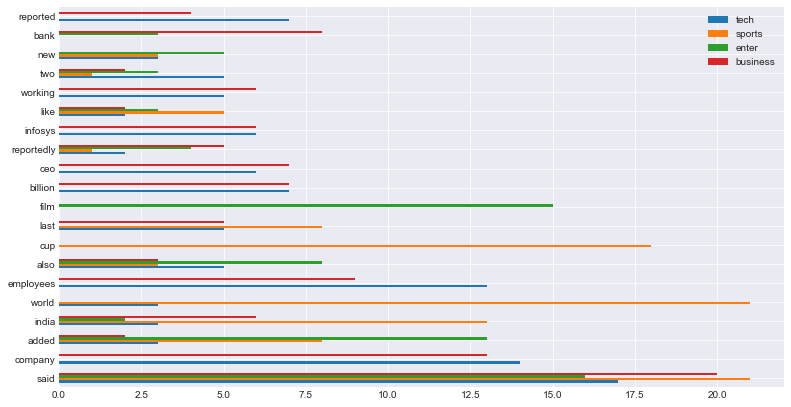

In [12]:
# plt.rc('font', size=18)
word_counts.sort_values(
    'all', ascending=False
)[['tech','sports','enter','business']].head(20).plot.barh()

In [13]:
word_counts.sort_values('all', ascending=False)\
 .head(20)\
 .apply(lambda row: row/row['all'], axis = 1)

,tech,sports,enter,business,all
said,0.229730,0.283784,0.216216,0.270270,1.0
company,0.518519,0.000000,0.000000,0.481481,1.0
added,0.115385,0.307692,0.500000,0.076923,1.0
india,0.125000,0.541667,0.083333,0.250000,1.0
world,0.125000,0.875000,0.000000,0.000000,1.0
employees,0.590909,0.000000,0.000000,0.409091,1.0
also,0.263158,0.157895,0.421053,0.157895,1.0
cup,0.000000,1.000000,0.000000,0.000000,1.0
last,0.277778,0.444444,0.000000,0.277778,1.0
film,0.000000,0.000000,1.000000,0.000000,1.0


Text(0.5, 1.0, '% of category for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

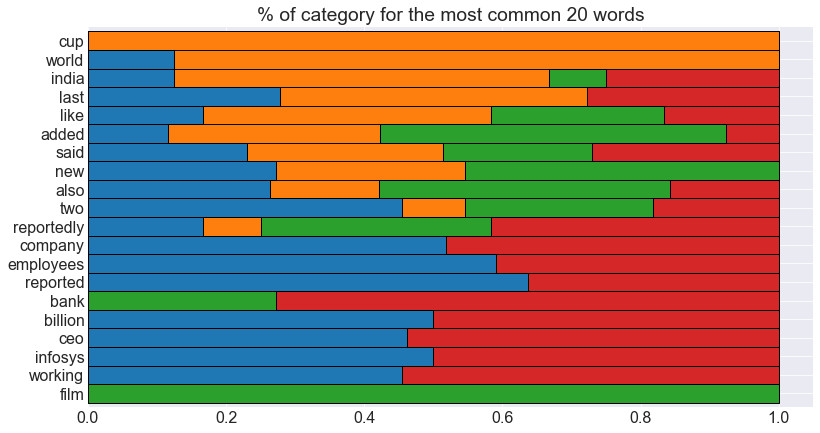

In [14]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'sports')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of category for the most common 20 words')

In [20]:
nltk.bigrams(all_words.split())

<generator object bigrams at 0x16707dba0>

<AxesSubplot:>

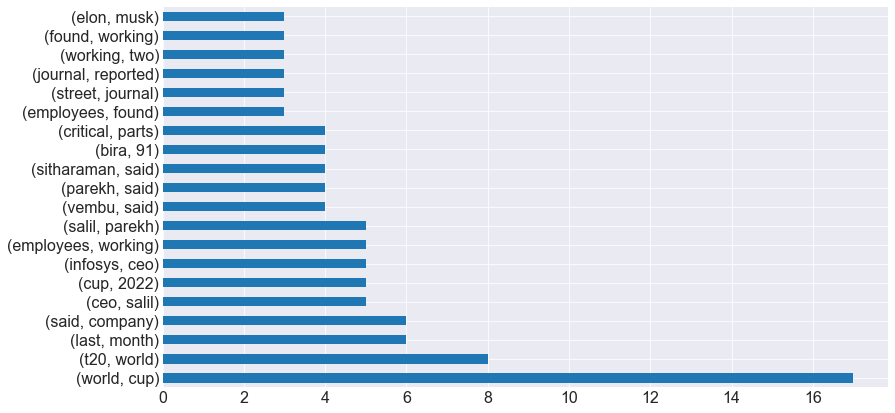

In [19]:
pd.Series(nltk.bigrams(all_words.split())
         ).value_counts().head(20).plot.barh()

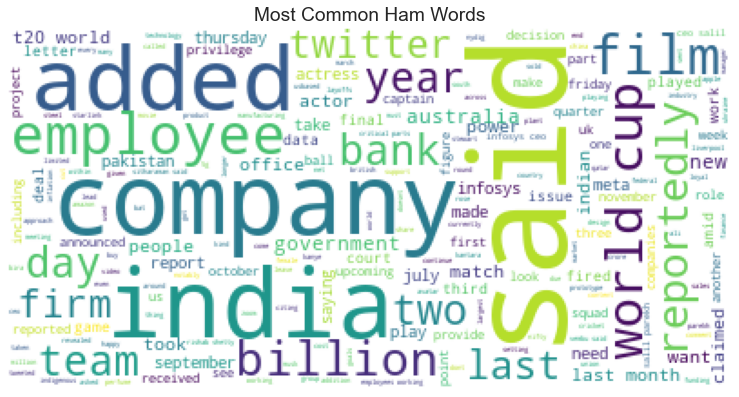

In [23]:
img = WordCloud(background_color='white'
               ).generate((all_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

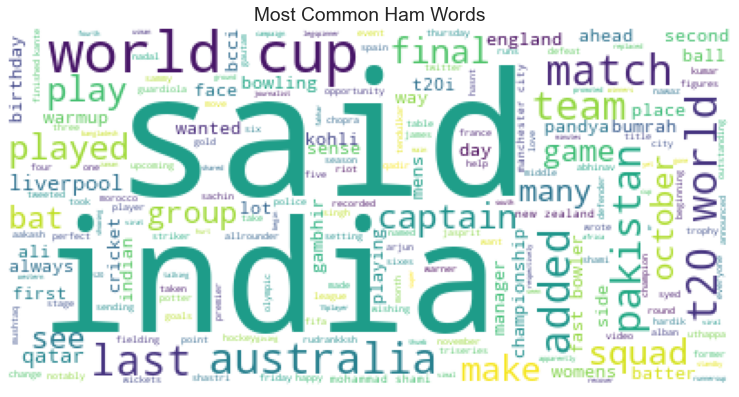

In [24]:
img = WordCloud(background_color='white'
               ).generate((sports_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

In [28]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

sia.polarity_scores(sports_words)

{'neg': 0.056, 'neu': 0.738, 'pos': 0.206, 'compound': 0.9993}

In [30]:
sia.polarity_scores(bus_words)

{'neg': 0.053, 'neu': 0.806, 'pos': 0.141, 'compound': 0.9977}

In [31]:
sia.polarity_scores(enter_words)

{'neg': 0.072, 'neu': 0.796, 'pos': 0.131, 'compound': 0.9955}

In [32]:
sia.polarity_scores(tech_words)

{'neg': 0.088, 'neu': 0.803, 'pos': 0.109, 'compound': 0.9629}

In [33]:
sia.polarity_scores(all_words)

{'neg': 0.068, 'neu': 0.785, 'pos': 0.147, 'compound': 0.9998}